In [2]:
from openbci_stream.handlers import HDF5_Writer
from datetime import datetime
from datetime import timedelta
import numpy as np
import time

now = datetime.now()

header = {'sample_rate': 1000,
          'datetime': now.timestamp(),
          'montage': 'Custom 1020|standard_1020|Fp1,Fp2,F7,Fz,F8,C3,Cz,C4,T5,P3,Pz,P4,T6,O1,Oz,O2'
         }

t0 = time.time()

with HDF5_Writer(f'unamed-{np.random.randint(0, 10)}.h5') as writer:

    writer.add_header(header)
    
    for i in range(60*30):
        eeg = np.random.normal(size=(1000, 16))
        timestamp = (now + timedelta(seconds=i)).timestamp()
        writer.add_eeg(eeg, timestamp)
        
      
print('size: 30 minutes, 1000Hz, 16ch')
print(f"Time: {time.time()-t0} s")


size: 30 minutes, 1000Hz, 16ch
Time: 1.7308628559112549 s


In [5]:
t0 = time.time()
data = np.random.normal(size=(1000*30*60, 16))

np.savetxt(f'unamed-{np.random.randint(0, 10)}.csv', data, delimiter=',')

print('size: 30 minutes, 1000Hz, 16ch')
print(f"Time: {time.time()-t0} s")

size: 30 minutes, 1000Hz, 16ch
Time: 38.98682975769043 s


NameError: name 'now' is not defined

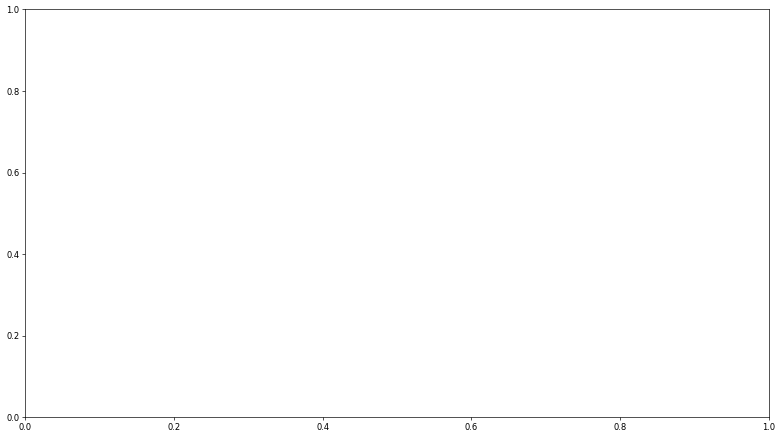

In [2]:
from openbci_stream.handlers import HDF5_Reader
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 9), dpi=60)

ax = plt.subplot(111)
with HDF5_Reader(f'sample-{now.timestamp()}.h5') as reader:
    
#     t = reader.timestamp

    channels = reader.header['montage'].split('|')[-1].split(',')
    
    for i, ch in enumerate(reader.eeg[:1000].T):
        plt.plot((ch-ch.mean())*0.1+i)
        
    ax.set_yticklabels(channels)
    